<a href="https://colab.research.google.com/github/AshmithaMB/Delinquency-Prediction/blob/main/Delinquency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###***About the Dataset***

*This dataset contains **characteristics of a customer/individual and the
Delinquency** (SeriousDlqin2yrs) which is the Dependent Variable*

*The challenge is to build a **model to classify the customers into Delinquent/Non-Delinquent**
(SeriousDlqin2yrs = 1 or 0)*

####***Contents of this Notebook***

***1. Data Dictionary***

***2. Importing Libraries & Loading the Dataset***

***3. Understanding the Data***
* *Statistical Analysis*

***4. Exploratory Data Analysis***
   * *Outlier Detection*
   * *Skewness Detection*
   * *Correlation*

***5. Data Preprocessing***
* *Missing Value Imputation*
  * KNN Imputer
  * Mean Strategy

* *Scaling*
  * Robust Scaler

***6. Balancing the Dataset while Model Building***

> ***Balanced Bagged Classifier***

* *Extra Trees*
* *Random Forest*
* *Adaptive Boosting* 
* *Categorical Boosting*
* *Gradient Boosting* 
* *Extreme Gradient Boosting*
* *Light Gradient Boosting Machine*



###***Data Dictionary***

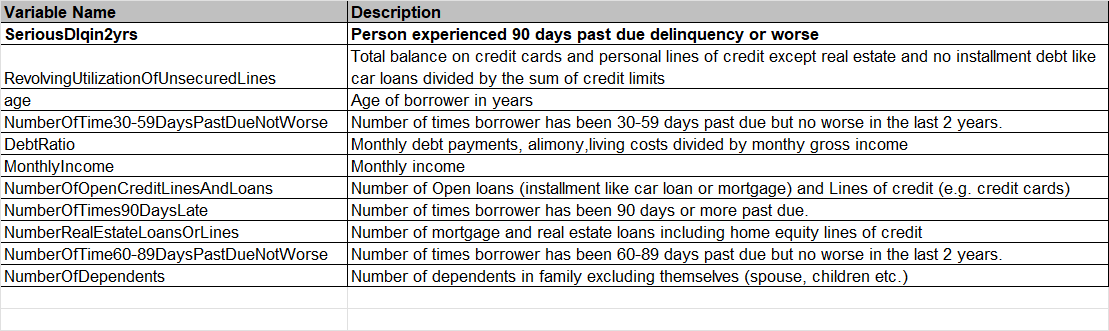

####***Importing Libraries***

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Feature Engineering

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn import preprocessing

# Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# ML Algorithms 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Ensembling

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# Evaluation Metrics

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

# Warnings

import warnings
warnings.filterwarnings('ignore')

####***Understanding the Data***

######***Loading the Dataset + Statistical Analysis***

In [ ]:
train = pd.read_csv('training.csv', index_col = 0)

In [ ]:
train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [ ]:
train.shape

(150000, 11)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [ ]:
train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

* All columns are numerical
* `MonthlyIncome` has 29,731 null values
* `NumberOfDependents` has 3,924 null values

In [ ]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


`DebtRatio`

> *The mean and the 50th percentile/second quartile has a difference of 353 making the standard deviation significantly large at 2038. `DebtRatio's` reliability is a bit questionable here.*


---

`NumberOfTime30-59DaysPastDueNotWorse	`, `NumberOfTime60-89DaysPastDueNotWorse`, `NumberOfTimes90DaysLate`
> *Highly skewed and might have outliers as IQR = (q3 - q1 = 0-0) 0, but the maximum value is 98.*

---
`RevolvingUtilizationOfUnsecuredLines	` 

> *The standard deviation extremely high at 249.8 explains the high variability/dispersion of the data point resulting in outliers.*


---

`age` 
> *Maximum age at 109 years is understandable, but Minimum is 0; truly absurd.*


In [ ]:
train[train.age < 20]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


* *Any customer record below the age of 20 is irrational, therefore dropping those records*

> *Seems there is only one record with the customer's age at 0.*




In [ ]:
train = train.drop(65696, axis = 0)

### ***Outlier Detection***

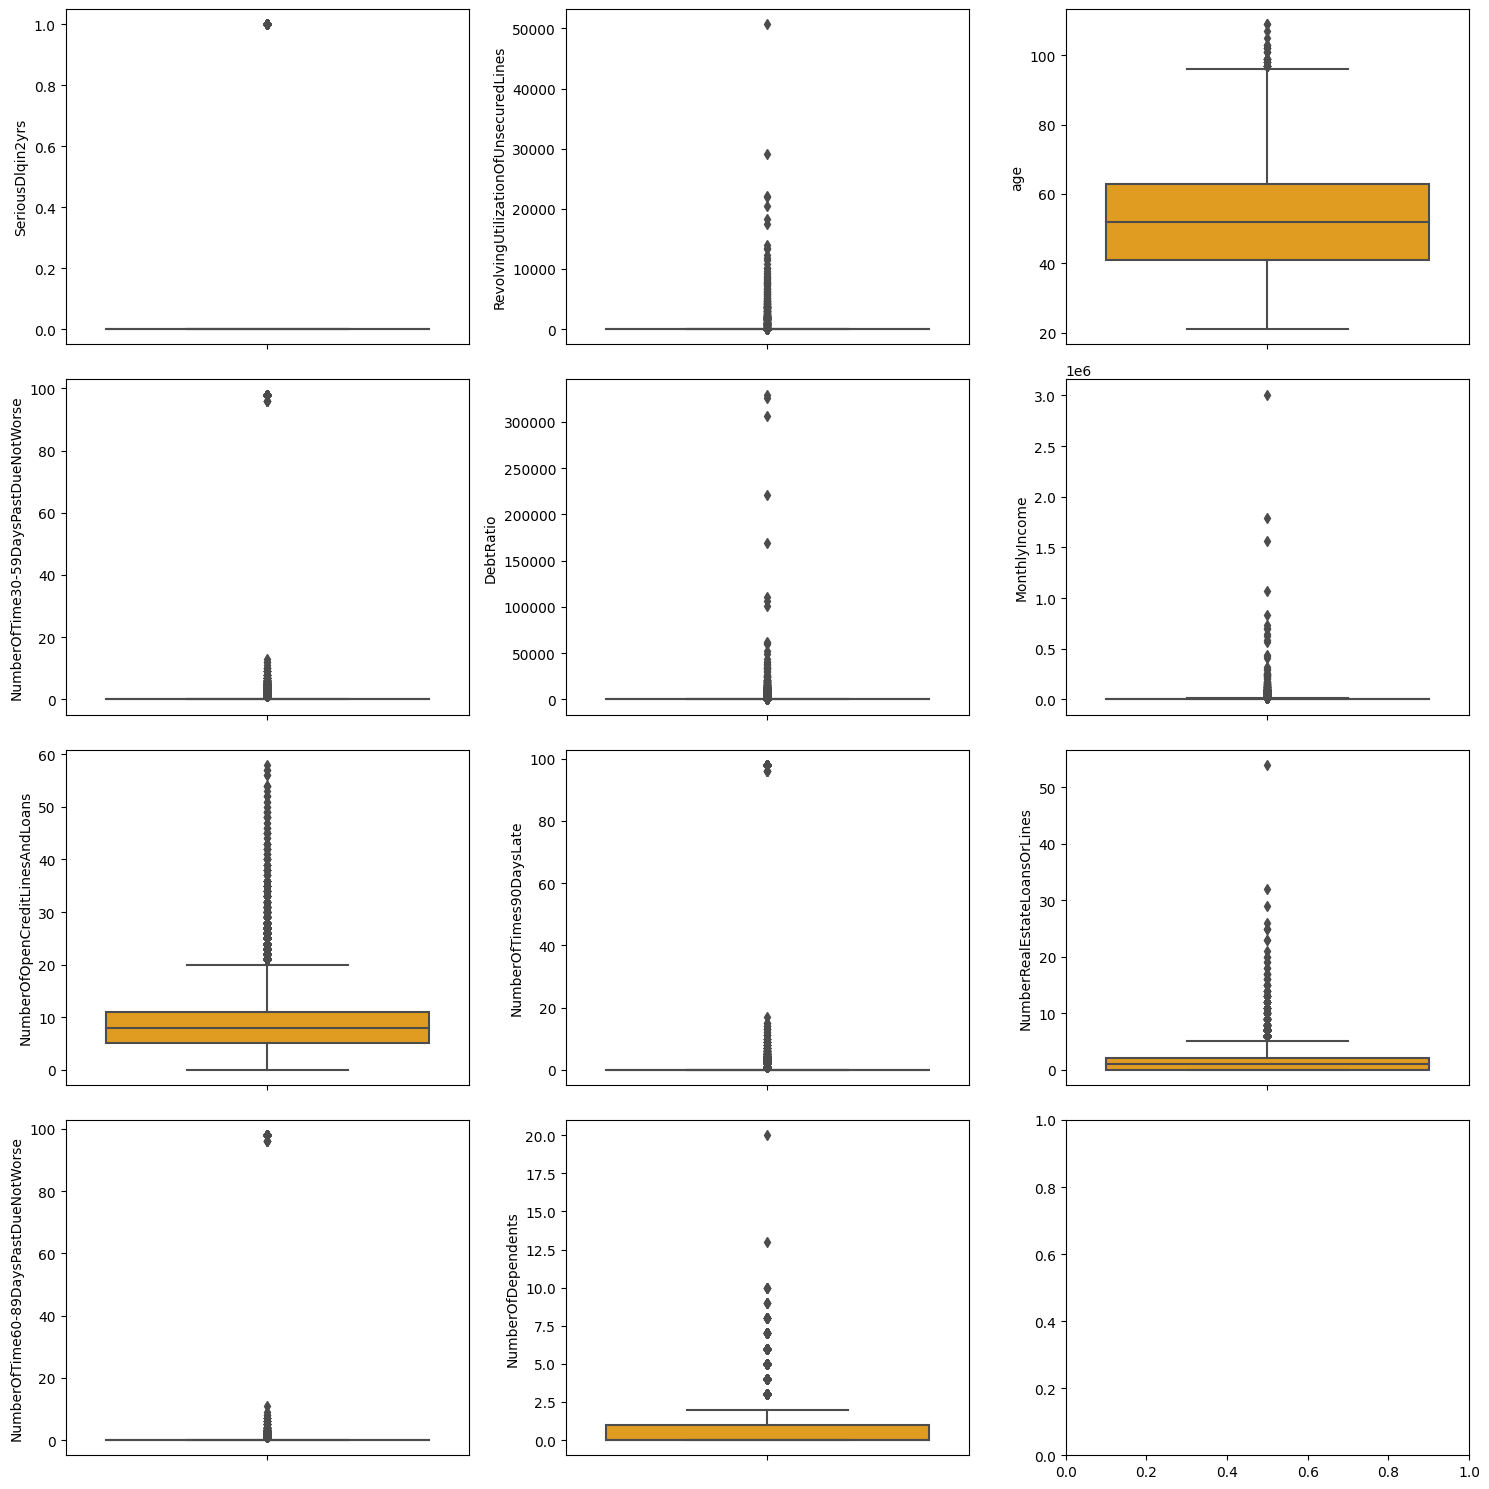

In [ ]:
fig , ax = plt.subplots(4,3, figsize = (15, 15))
i = 0
j = 0

for col in train.columns:
    sns.boxplot(ax = ax[i,j], data = train, y = col, color = 'orange')
    j += 1
    if j == 3:
        j = 0
        i += 1
fig.tight_layout()

* Retaining the Outliers here as they are vital and valid data points for training the model

#####***Assesing our Customers' Risk Level & Creditworthiness***


 `NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTime60-89DaysPastDueNotWorse`, `NumberOfTimes90DaysLate`

---


*These features measure the number of times the customer has been late on a payment for a respective period of 30 to 59 days/ 60-89 days/ 90 days or more*


> Most of our customers falling in these categories made payments on time in the given time frame respectively ✔ ; except a few of them who failed to pay in the given time frame but haven't totally gone delinquent.



##### ***Debt Ratio***


In [ ]:
print('Records with Debt Ratio under 36 : ',len(train[train.DebtRatio < 36]))

Records with Debt Ratio under 36 :  123251


In [ ]:
print('Records with Debt Ratio over 36 : ',len(train[train.DebtRatio > 36]))

Records with Debt Ratio over 36 :  26687


`DebtRatio`

*Debt-to-Income Ratio* 
***Total Debt ➗ Gross Income***

* *Used to determine a customer's ability to manage their debt and make timely payments.*

---

> *Overall there are 1,23,251 of our customers whose debt ratio is under 36% which is generally considered good and safe*.
> > *Few records have extremely high DebtRatio at 37%  and above this indicates that the customer is having difficulty in making payments and may indicate a risk of default*

##### ***Credit Lines***

`NumberOfOpenCreditLinesAndLoans` & `NumberRealEstateLoansOrLines`


---
>  *Many of our customers' open credit lines and loans are significantly huge, this may turn out to be riskier and may even result in bad debts as they would have a lot of difficulty in making their numerous debt payments.*
> > *On the other hand, real estate loans/lines of our customers are present in large numbers too, but are comparitively very low.* 
* *This anyway doesn't pose a risk and they might make payments on time as they would not want to forego their investments in real estate (collaterals).*


##### ***Credit Balance***

`RevolvingUtilizationOfUnsecuredLines`


---

> *Almost all our customers have very less credit balance except one customer at 50,708.*
> > *The IQR from above is around 0.4*

####**Checking for Skewness**

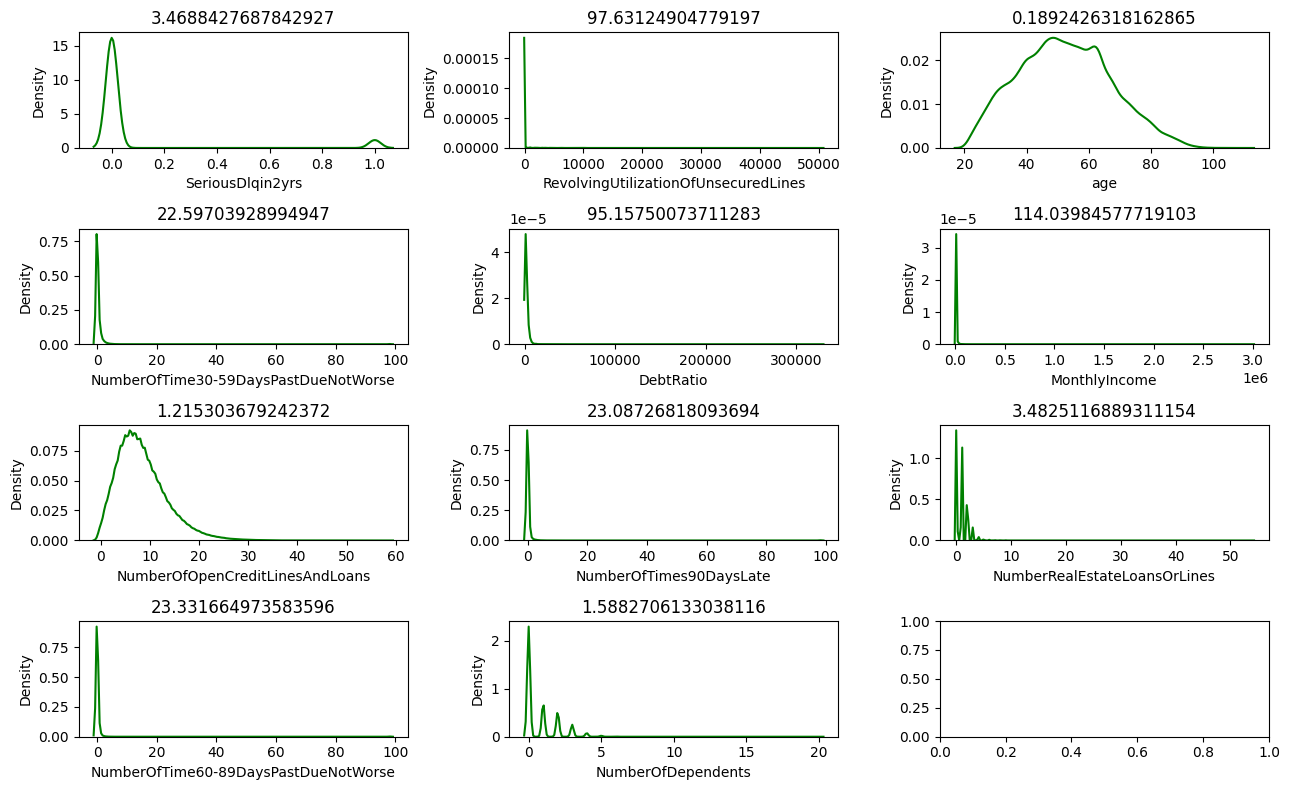

In [ ]:
fig , ax = plt.subplots(4,3, figsize = (13, 8))
i = 0
j = 0

for col in train.columns:
    sns.kdeplot(ax = ax[i,j], data = train, x = col, color = 'green')
    ax[i,j].set_title(train[col].skew())
    j += 1
    if j == 3:
        j = 0
        i += 1
fig.tight_layout()

> *Almost all the features are skewed as there is a strong presence of outliers.*
> *`MonthlyIncome`, `RevolvingUtilizationOfUnsecuredLines`,`DebtRatio` are highly skewed amongst all.*
> > *`MonthlyIncome` may require values to be imputed to guard against distorted results.*

###***Checking the Correlation***

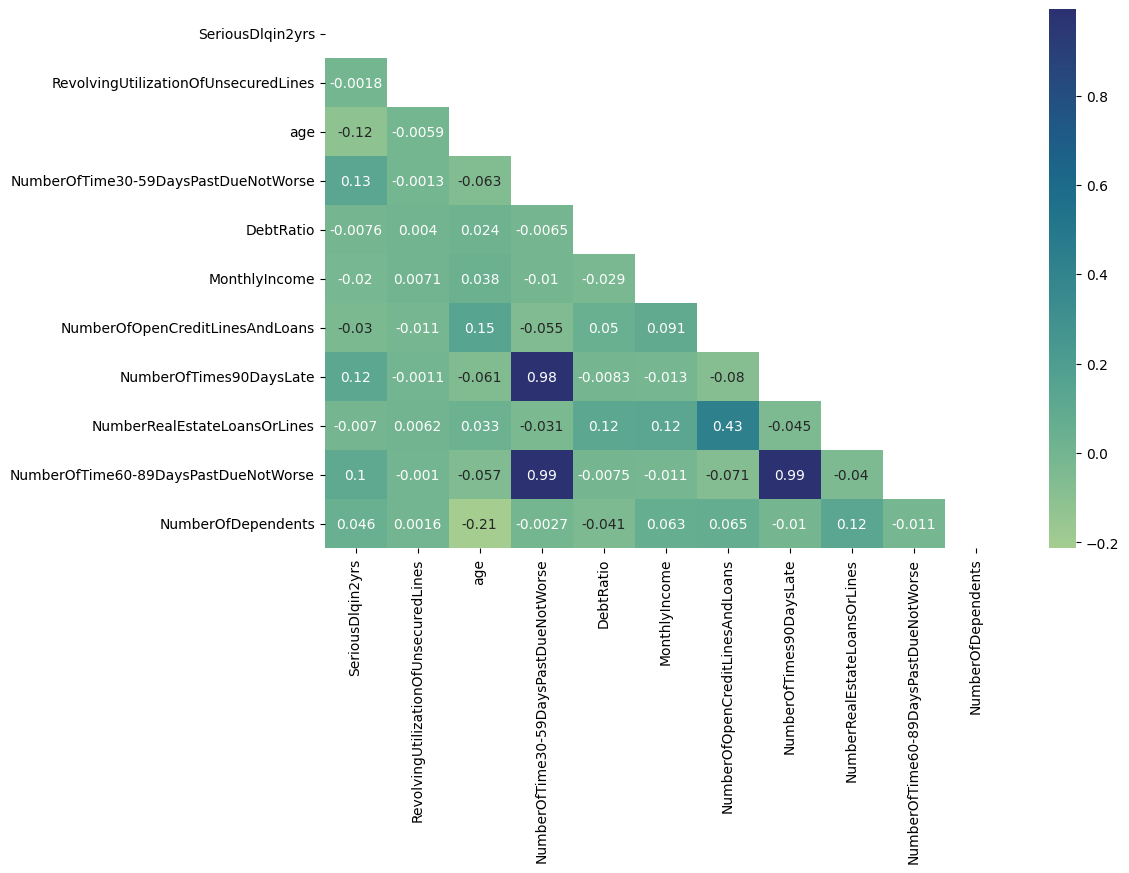

In [ ]:
corr = train.corr()
plt.figure(figsize=(11,7))
steps = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=steps, cmap="crest");

> *A very strong correlation can be observed between:*

> *`NumberOfTime60-89DaysPastDueNotWorse` and `NumberOfTime30-59DaysPastDueNotWorse` at 0.99*

> *& `NumberOfTime60-89DaysPastDueNotWorse` and `NumberOfTimes90DaysLate` at 0.99*

> *and also between `NumberOfTime30-59DaysPastDueNotWorse` and `NumberOfTimes90DaysLate`*

* *Even though the above three features are very strongly correlated, dropping them just on their correlation score would result in a high loss of information which may inturn reduce the accuracy of the model.* 
> *For instance, by dropping `NumberOfTime30-59DaysPastDueNotWorse`*
> * *we would be left with `NumberOfTime60-89DaysPastDueNotWorse` & `NumberOfTimes90DaysLate`*
> * *These features would not provide information as to how many customers/borrowers fell in the category of `NumberOfTime30-59DaysPastDueNotWorse`, and how many of them made payments on time within the specific time frame of 30 - 59 days.*


***Checking the relationship between Customers with Past Dues and their Delinquency***

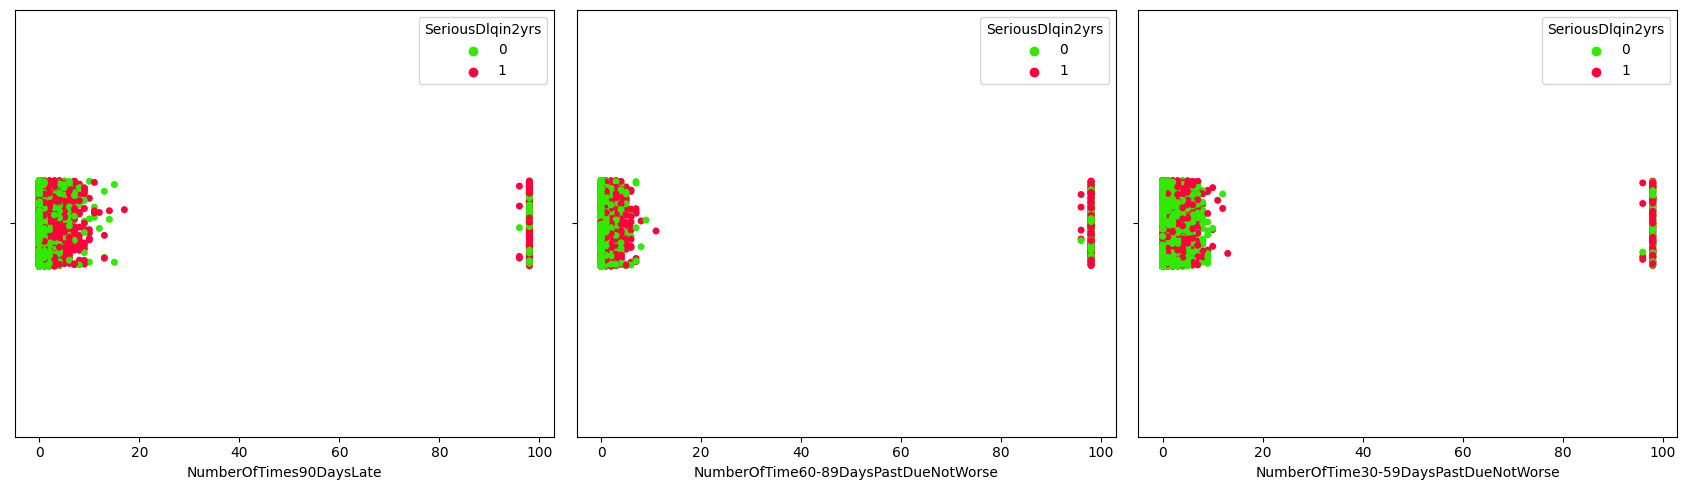

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

sns.stripplot(x='NumberOfTimes90DaysLate', hue = 'SeriousDlqin2yrs', palette = 'prism',data=train, ax=ax[0])
sns.stripplot(x='NumberOfTime60-89DaysPastDueNotWorse',palette = 'prism', hue = 'SeriousDlqin2yrs', data=train, ax=ax[1])
sns.stripplot(x='NumberOfTime30-59DaysPastDueNotWorse',  palette = 'prism',hue = 'SeriousDlqin2yrs', data=train, ax=ax[2])

plt.tight_layout();

In [ ]:
print('Number of Customers who went Delinquent : ',len(train[train.SeriousDlqin2yrs == 1]))

print('Percentage of Number Customers who went Delinquent : ',(len(train[train.SeriousDlqin2yrs == 1])/train.shape[0]))

Number of Customers who went Delinquent :  10026
Percentage of Number Customers who went Delinquent :  0.06684044560297069


* Though many of our customers have exceeded their respective repayment duration, very few of the many have gone delinquent. 
> We could enhance our credit repayment collection techniques to increase efficiency and minimize delinquency rates. 

    > Additionally, we could plan to conduct a more robust analysis of our customers' debt ratios and other credit lines to further decrease the delinquency rates
    .

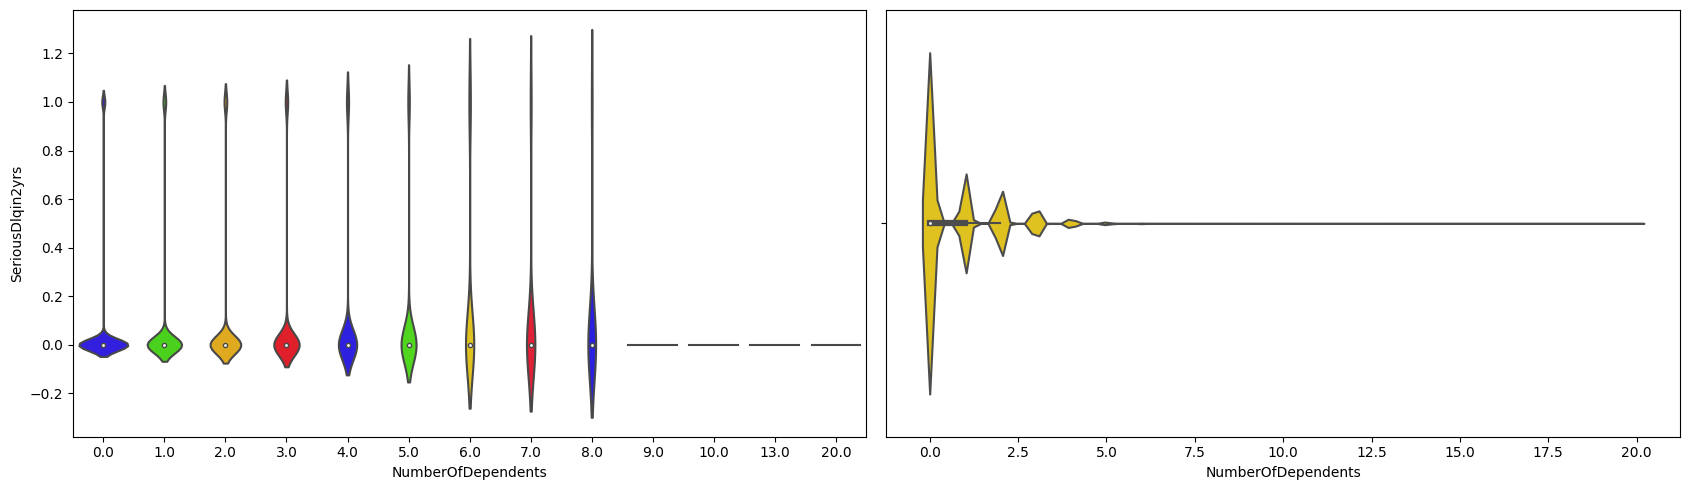

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))
sns.violinplot(x='NumberOfDependents', y = 'SeriousDlqin2yrs', palette = 'prism',data=train, ax=ax[0])
sns.violinplot(x='NumberOfDependents',  palette = 'prism',data=train, ax=ax[1])
plt.tight_layout()
plt.show()

> *Maximum number of dependents are 20 and Minimum is 0.*
> > *The average number of dependents is also 0 indicating lower responsibility and thus lowered level of risk as they are only accountable of themselves. There are high chances for us to receive payments on time*


###***Missing Value Imputation***

> *The missing values in `MonthlyIncome` are at 29,731 and th outliers here are of paramount importance and they carry a lot of information; therfore, it doesn't seem appropriate to use median/mode to impute the missing values*. 
- *Hence why, KNN;* 
> > *The KNN Imputer uses the values of the k-nearest neighbors to estimate the missing values which inturn retains the outliers.*

In [ ]:
imputer = KNNImputer(n_neighbors=5)

In [ ]:
test = pd.read_csv('/content/test.csv', index_col = 0)

* Converting 1D array to a 2D array before imputing

In [ ]:
income_2d = np.array(train.MonthlyIncome).reshape(-1,1)
income_2dd = np.array(test.MonthlyIncome).reshape(-1,1)

In [ ]:
imputer.fit(income_2d)
imputer.fit(income_2dd)

KNNImputer()

In [ ]:
train.MonthlyIncome = imputer.transform(income_2d)
test.MonthlyIncome = imputer.transform(income_2dd)

* *There are about 3,924 missing values in `NumberOfDependents` and the outlier range is pretty narrow around 0-20; thus, filling null values with the median value seems reasonable*

In [ ]:
train.NumberOfDependents= train.NumberOfDependents.fillna(train.NumberOfDependents.median())
test.NumberOfDependents= test.NumberOfDependents.fillna(test.NumberOfDependents.median())

####***Performing Scaling***

In [ ]:
X = train.drop('SeriousDlqin2yrs', axis=1)
y = train['SeriousDlqin2yrs']

> *The distributions have many outliers and are highy skewed, It is better to use Robust Scaler as it uses the median and interquartile range (IQR) to scale the values.*

In [ ]:
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X)

*Converting into a DataFrame*

In [ ]:
X_df = pd.DataFrame(X_scaled, columns=X.columns)

####***Imbalanced Dataset Treatment***

In [ ]:
train_0_df = train[train['SeriousDlqin2yrs'] == 0]
train_1_df = train[train['SeriousDlqin2yrs'] == 1]

In [ ]:
print(train_0_df.shape)
print(train_1_df.shape)

(139973, 11)
(10026, 11)


#####***Splitting train and test data***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=55)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((104999, 10), (45000, 10), (104999,), (45000,))

###***Building a suitable ML Model for this Imbalanced Dataset***

In [ ]:
estimators = [XGBClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),ExtraTreesClassifier(),
              lgb.LGBMClassifier(),CatBoostClassifier(verbose=False),RandomForestClassifier()]

results_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

for estimator in estimators:
    clf = BalancedBaggingClassifier(base_estimator=estimator, n_estimators=10, sampling_strategy='not majority',
                                     replacement=False, random_state=42)
    clf.fit(X_train, y_train)
    estimator_name = estimator.__class__.__name__
    y_pred = clf.predict(X_test)
    clf_report = classification_report(y_test, y_pred, output_dict=True)
    acc, recall, precision, f1 = clf_report['accuracy'], clf_report['macro avg']['recall'], clf_report['macro avg']['precision'], clf_report['macro avg']['f1-score']
    results_df = results_df.append({'Classifier': estimator_name, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}, ignore_index=True)

In [ ]:
results_df

,Classifier,Accuracy,Recall,Precision,F1 Score
0,XGBClassifier,0.938200,0.593660,0.770576,0.631727
1,GradientBoostingClassifier,0.937978,0.592289,0.768218,0.629866
2,AdaBoostClassifier,0.936244,0.599346,0.744732,0.635370
3,ExtraTreesClassifier,0.936644,0.589070,0.751797,0.624452
4,LGBMClassifier,0.938756,0.593644,0.778588,0.632461
5,CatBoostClassifier,0.937489,0.592184,0.761619,0.629102
6,RandomForestClassifier,0.937444,0.589968,0.761999,0.626502


* *There was little or no change observed in the models' performance with hypermarameter tuning*

*Amongst the above models,*

> *1. All the models have the same accuracy score at 93% but LGBM Classifier and XGB Classifier have a slight increase at 93.8% ; this explains that out of all the predicted instances, 93% are correctly classified (True Negatives as True Negatives and True Positives as True Positives)*

> *2. Almost all the models have the same recall score at 59% meaning that 59% of them are correctly predicted (truly positive) out of all the actual positives. AdaBoost tops here too at 59.9% followed by XGB Classifier and LGBM Classifier*

> *3. Highest precision score observed is 77.8% by LGBM Classifier,followed by XGB Classifier at 77% ; meaning that out of all positive predicted instances, 77% of them turned out to be actually positive.*

> *4. AdaBoost Classifier has the highest F1 Score at 63.5% followed by LGBM Classifier at 63.2%*

***Visualizing the Classification Report and Confusion Matrix for the best performing Models***

In [ ]:
def plot(model, train_df, test_df, y_train, y_test):
    model.fit(train_df, y_train)
    y_pred = model.predict(test_df)
    cm = confusion_matrix(y_test, y_pred)

    clf_report = classification_report(y_true=y_test, y_pred=y_pred, output_dict=True)
    df_report = pd.DataFrame(clf_report).transpose()
    df_report = df_report.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0)

    fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

    sns.heatmap(cm, annot=True, fmt=".0f", cmap='crest', ax=axs[0])
    axs[0].set_title('Confusion Matrix')

    sns.heatmap(df_report.iloc[:, :-1], annot=True, cmap='crest', ax=axs[1])
    axs[1].set_title('Classification Report')

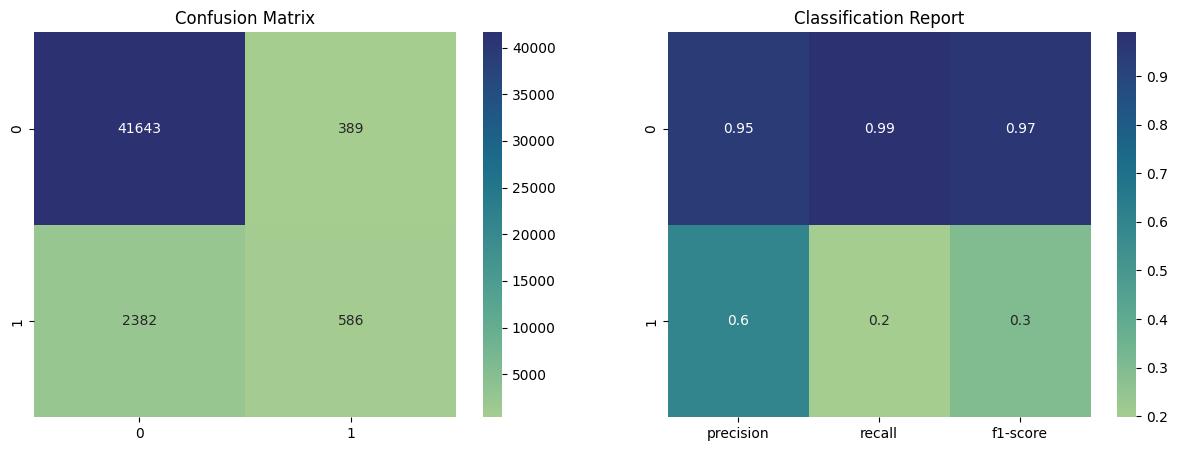

In [ ]:
plot(lgb.LGBMClassifier(), X_train, X_test, y_train, y_test)

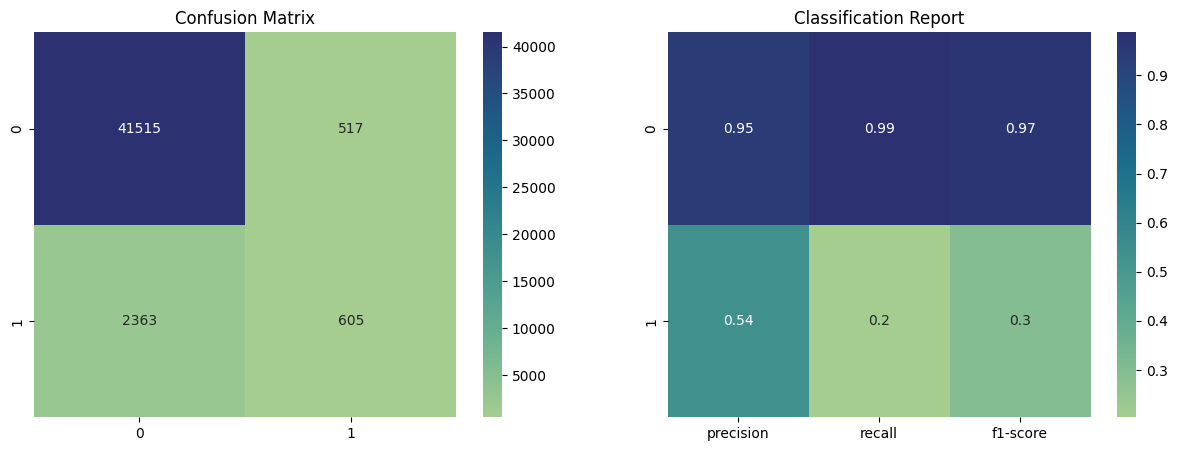

In [ ]:
plot(AdaBoostClassifier(), X_train, X_test, y_train, y_test)

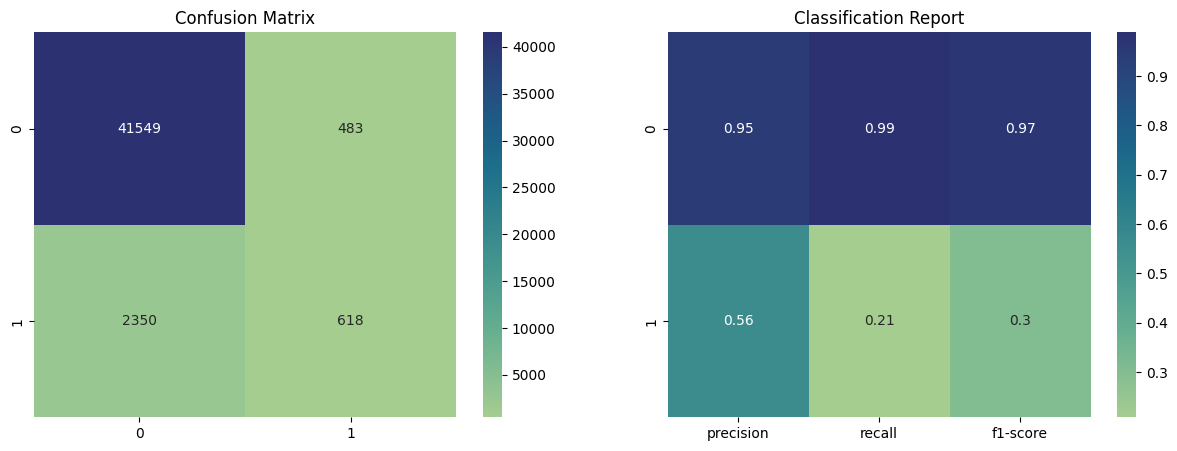

In [ ]:
plot(XGBClassifier(), X_train, X_test, y_train, y_test)